Test Predictions: [1 1 1]
Accuracy: 100.00%
Feature ranking:
1. feature SC (0.5084110498428345)
2. feature P (0.24897758662700653)
3. feature SE (0.24261131882667542)


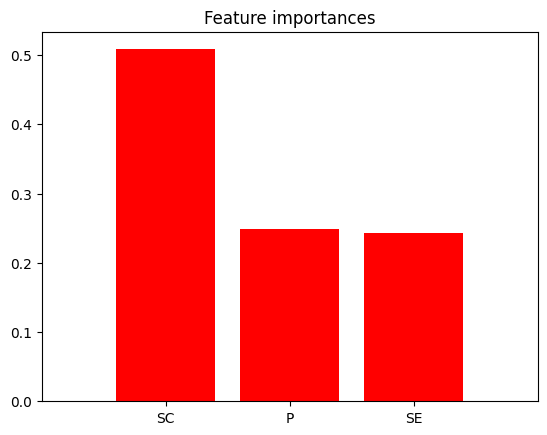

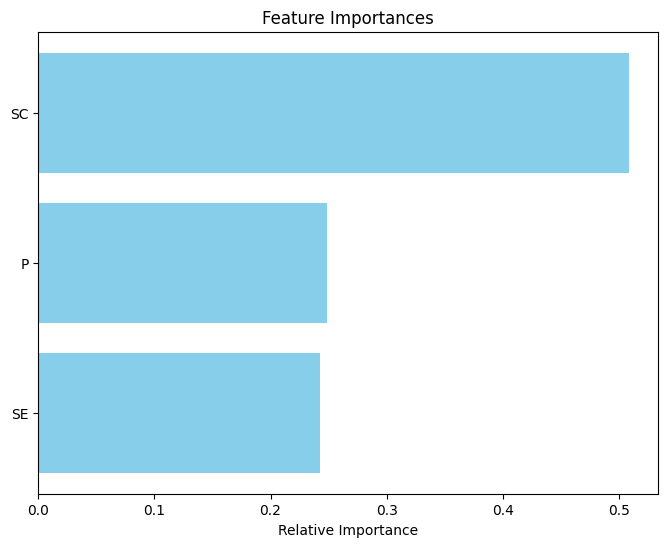

In [1]:
import numpy as np
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

# 准备数据
train_data = np.array([
    [13.3809, -0.817, 0, 1],
    [11.484, -2.504, 0, 1],    
    [13.3809, -0.088, 0, 0],
    [11.484, -0.182, 0, 0],
    [8.6442, -2.785, 0, 0],
    [13.3809, -0.817, 5, 1],
    [13.3809, -0.817, 10, 1],
    [13.3809, -0.817, 15, 1],
    [13.3809, -0.088, 5, 0],
    [13.3809, -0.088, 10, 1],    
    [8.6442, -2.785, 5, 0],
    [8.6442, -2.785, 10, 0],
    [8.6442, -2.785, 15, 0],
    [11.484, -2.504, 5, 1],
    [11.461, -6.412, 0, 1],    
    [11.484, -2.504, 10, 1]
])

test_data = np.array([     
    [13.3809, -0.088, 20, 1],   
    [13.3809, -0.564, 0, 1],
    [13.0295, -2.692, 0, 1]
])
# 分离特征和标签
X_train = train_data[:, :-1]
y_train = train_data[:, -1]
X_test = test_data[:, :-1]
y_test = test_data[:, -1]  # 假设测试数据中包含了真实的标签

# 训练XGBoost模型
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# 预测测试数据
y_pred = model.predict(X_test)
print("Test Predictions:", y_pred)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 特征名称
feature_names = ['SC', 'SE', 'P']

# 获取并打印特征重要性
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {feature_names[indices[f]]} ({importances[indices[f]]})")

# 特征重要性图表
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices])
plt.xlim([-1, X_train.shape[1]])
plt.show()

# 特征重要性和索引
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# 创建纵向的特征重要性图表
plt.figure(figsize=(8, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.gca().invert_yaxis()  # 将最重要的特征放在图形的顶部
plt.show()